In [28]:
#  data: https://finance.yahoo.com/quote/MSFT/history/
import pandas as pd

In [29]:
df = pd.read_csv('data/accenture.csv')

df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0
...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0
5080,2021-09-28,331.559998,332.019989,323.859985,324.209991,2300500,0.0,0


In [30]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2001-07-19,11.286116
1,2001-07-20,11.167080
2,2001-07-23,11.159637
3,2001-07-24,11.055481
4,2001-07-25,11.122439
...,...,...
5077,2021-09-23,343.000000
5078,2021-09-24,339.230011
5079,2021-09-27,334.510010
5080,2021-09-28,324.209991


In [31]:
df['Date']

0       2001-07-19
1       2001-07-20
2       2001-07-23
3       2001-07-24
4       2001-07-25
           ...    
5077    2021-09-23
5078    2021-09-24
5079    2021-09-27
5080    2021-09-28
5081    2021-09-29
Name: Date, Length: 5082, dtype: object

In [32]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('2001-07-19')
datetime_object

datetime.datetime(2001, 7, 19, 0, 0)

In [33]:
df['Date'] = df['Date'].apply(str_to_datetime)

df['Date']

C:\Users\rhihi\AppData\Local\Temp\ipykernel_37856\869369148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2001-07-19
1      2001-07-20
2      2001-07-23
3      2001-07-24
4      2001-07-25
          ...    
5077   2021-09-23
5078   2021-09-24
5079   2021-09-27
5080   2021-09-28
5081   2021-09-29
Name: Date, Length: 5082, dtype: datetime64[ns]

In [34]:
df['Date']

0      2001-07-19
1      2001-07-20
2      2001-07-23
3      2001-07-24
4      2001-07-25
          ...    
5077   2021-09-23
5078   2021-09-24
5079   2021-09-27
5080   2021-09-28
5081   2021-09-29
Name: Date, Length: 5082, dtype: datetime64[ns]

In [35]:
df.index = df.pop('Date')
df

,Close
Date,
2001-07-19,11.286116
2001-07-20,11.167080
2001-07-23,11.159637
2001-07-24,11.055481
2001-07-25,11.122439
...,...
2021-09-23,343.000000
2021-09-24,339.230011
2021-09-27,334.510010


<Axes: xlabel='Date'>

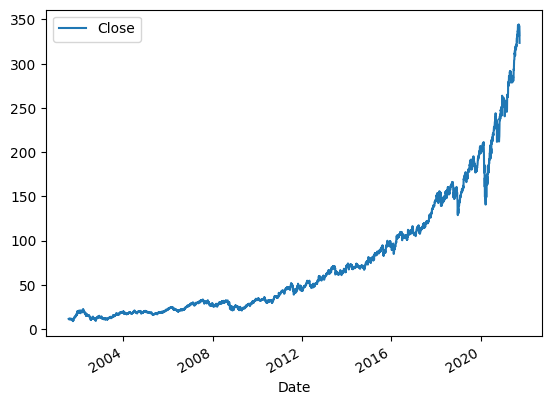

In [36]:
df.plot()

# import matplotlib.pyplot as plt

# plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df


# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2001-07-24', 
                                '2021-09-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2001-07-24,11.286116,11.167080,11.159637,11.055481
1,2001-07-25,11.167080,11.159637,11.055481,11.122439
2,2001-07-26,11.159637,11.055481,11.122439,10.787649
3,2001-07-27,11.055481,11.122439,10.787649,10.795089
4,2001-07-30,11.122439,10.787649,10.795089,10.936443
...,...,...,...,...,...
5074,2021-09-23,332.290009,331.149994,334.660004,343.000000
5075,2021-09-24,331.149994,334.660004,343.000000,339.230011
5076,2021-09-27,334.660004,343.000000,339.230011,334.510010
5077,2021-09-28,343.000000,339.230011,334.510010,324.209991


In [38]:
def windowed_df_to_X_y(windowed_df):
  df_as_np = windowed_df.to_numpy()
  
  dates = df_as_np[:, 0]
  
  mid = df_as_np[:, 1:-1]
  
  X = mid.reshape((len(mid), mid.shape[1], 1)) #  1 for univarient forecasting

  Y = df_as_np[:, -1]
  
  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, Y = windowed_df_to_X_y(windowed_df)

dates.shape, X.shape, Y.shape

((5079,), (5079, 3, 1), (5079,))

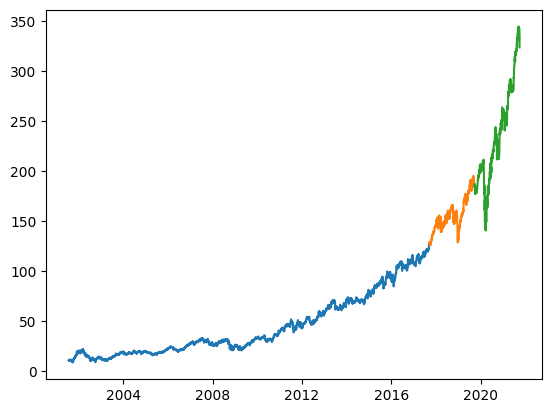

In [39]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80] # 80% of data for training

dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90] # 10% of data for validation
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:] # 10% of data for testing

plt.plot(dates_train, Y_train, label='Train')
plt.plot(dates_val, Y_val, label='Validation')
plt.plot(dates_test, Y_test, label='Test')

In [40]:
!pip show tensorflow



Name: tensorflow
Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\rhihi\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [42]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
					layers.Dense(32, activation='relu'),
					layers.Dense(32, activation='relu'),
					layers.Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
127/127 [==============================] - 3s 7ms/step - loss: 1529.8794 - mean_absolute_error: 27.1123 - val_loss: 5522.8564 - val_mean_absolute_error: 72.4942
Epoch 2/100
127/127 [==============================] - 0s 3ms/step - loss: 9.3582 - mean_absolute_error: 1.1550 - val_loss: 1676.8407 - val_mean_absolute_error: 37.6465
Epoch 3/100
127/127 [==============================] - 0s 3ms/step - loss: 0.9809 - mean_absolute_error: 0.6299 - val_loss: 1417.2098 - val_mean_absolute_error: 34.0832
Epoch 4/100
127/127 [==============================] - 0s 4ms/step - loss: 0.8475 - mean_absolute_error: 0.6188 - val_loss: 1270.5433 - val_mean_absolute_error: 31.8663
Epoch 5/100
127/127 [==============================] - 0s 4ms/step - loss: 0.7951 - mean_absolute_error: 0.6123 - val_loss: 1197.9880 - val_mean_absolute_error: 30.7932
Epoch 6/100
127/127 [==============================] - 0s 4ms/step - loss: 0.8448 - mean_absolute_error: 0.6307 - val_loss: 1143.4768 - val_mean_absolu

KeyboardInterrupt: 

127/127 [==============================] - 0s 1ms/step


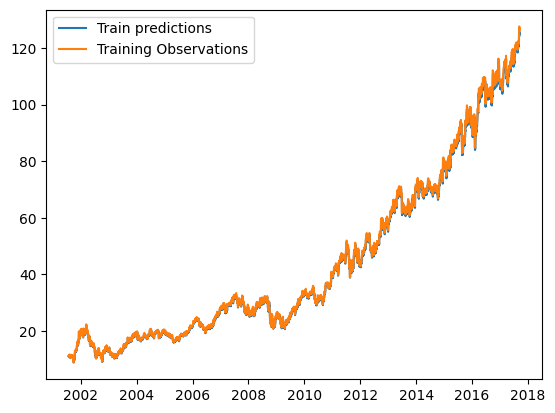

In [46]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Train predictions', 'Training Observations'])

16/16 [==============================] - 0s 4ms/step


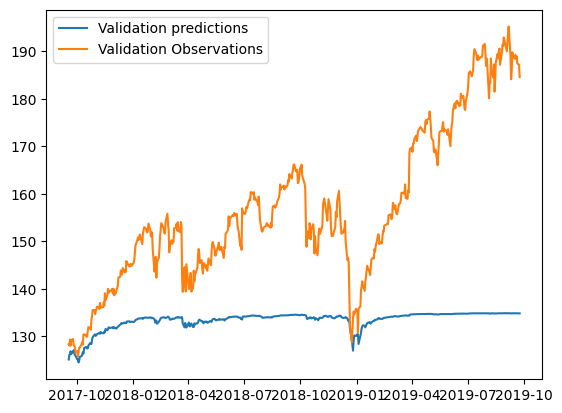

In [44]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation predictions', 'Validation Observations'])

16/16 [==============================] - 0s 2ms/step


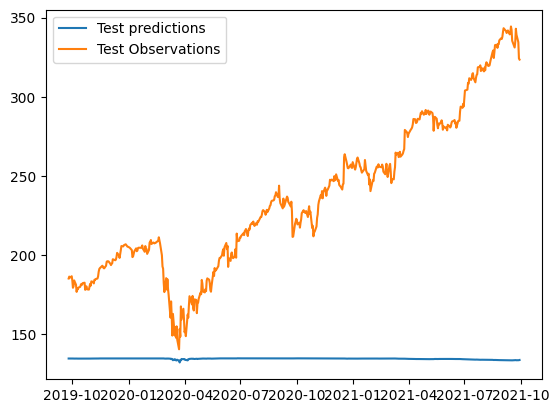

In [45]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Test predictions', 'Test Observations'])


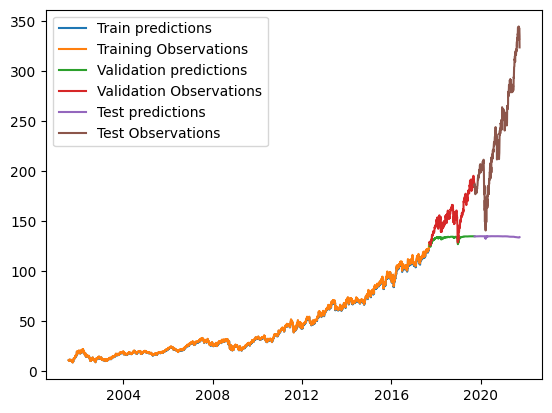

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Train predictions', 
            'Training Observations', 
            'Validation predictions', 
            'Validation Observations', 
            'Test predictions', 
            'Test Observations'])


In [74]:
windowed_df = df_to_windowed_df(df, 
                                '2020-09-29', 
                                '2021-09-29', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-09-29,211.602234,211.809479,219.852371,221.135300
1,2020-09-30,211.809479,219.852371,221.135300,223.020218
2,2020-10-01,219.852371,221.135300,223.020218,222.220840
3,2020-10-02,221.135300,223.020218,222.220840,219.477371
4,2020-10-05,223.020218,222.220840,219.477371,220.553040
...,...,...,...,...,...
248,2021-09-23,332.290009,331.149994,334.660004,343.000000
249,2021-09-24,331.149994,334.660004,343.000000,339.230011
250,2021-09-27,334.660004,343.000000,339.230011,334.510010
251,2021-09-28,343.000000,339.230011,334.510010,324.209991


In [75]:
dates, X, Y = windowed_df_to_X_y(windowed_df)

dates.shape, X.shape, Y.shape

((253,), (253, 3, 1), (253,))

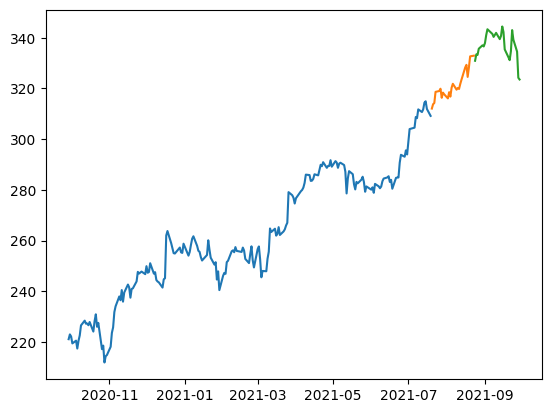

In [76]:
import matplotlib.pyplot as plt

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, Y_train = dates[:q_80], X[:q_80], Y[:q_80] # 80% of data for training

dates_val, X_val, Y_val = dates[q_80:q_90], X[q_80:q_90], Y[q_80:q_90] # 10% of data for validation
dates_test, X_test, Y_test = dates[q_90:], X[q_90:], Y[q_90:] # 10% of data for testing

plt.plot(dates_train, Y_train, label='Train')
plt.plot(dates_val, Y_val, label='Validation')
plt.plot(dates_test, Y_test, label='Test')

In [ ]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(128),
					layers.Dense(32, activation='relu'),
					layers.Dense(32, activation='relu'),
					layers.Dense(32, activation='relu'),
     				layers.Dense(32, activation='relu'),
					layers.Dense(32, activation='relu'),
					layers.Dense(32, activation='relu'),
					layers.Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mean_absolute_error'])

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 84ms/step - loss: 69402.3125 - mean_absolute_error: 262.2973 - val_loss: 102949.6719 - val_mean_absolute_error: 320.8108
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 69319.5781 - mean_absolute_error: 262.1400 - val_loss: 102810.6094 - val_mean_absolute_error: 320.5940
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 69170.3281 - mean_absolute_error: 261.8550 - val_loss: 102535.4609 - val_mean_absolute_error: 320.1645
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 68840.2734 - mean_absolute_error: 261.2252 - val_loss: 101850.3438 - val_mean_absolute_error: 319.0928
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 68088.7266 - mean_absolute_error: 259.7870 - val_loss: 100504.2891 - val_mean_absolute_error: 316.9766
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 66579.4766 - mean_absolute_error: 256.8465 - val_loss: 975

7/7 [==============================] - 0s 2ms/step


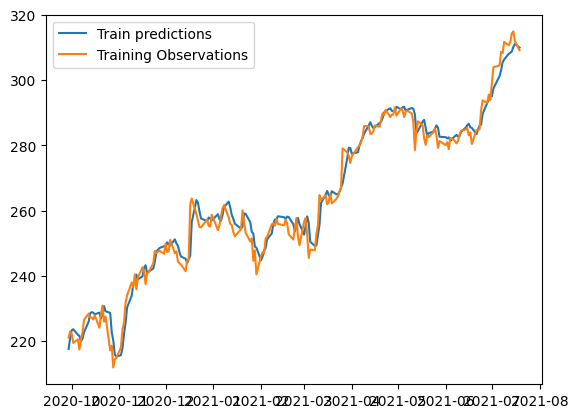

In [104]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.legend(['Train predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


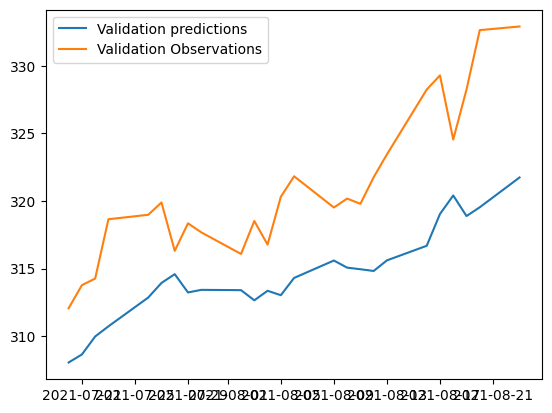

In [105]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.legend(['Validation predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


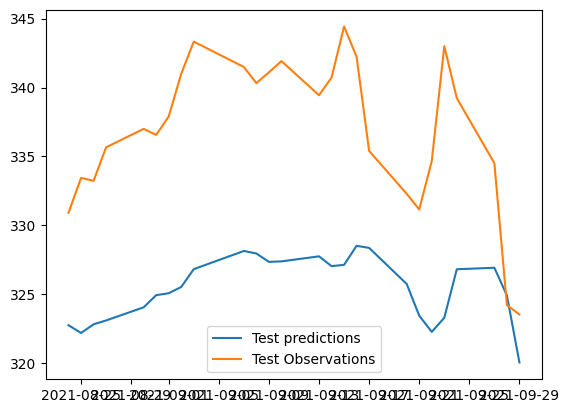

In [106]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Test predictions', 'Test Observations'])

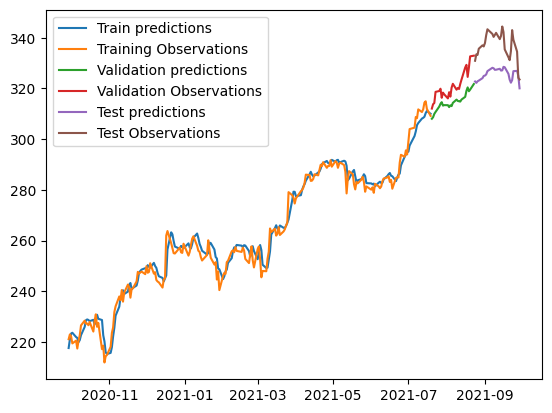

In [107]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.legend(['Train predictions', 
            'Training Observations', 
            'Validation predictions', 
            'Validation Observations', 
            'Test predictions', 
            'Test Observations'])


In [130]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    # Assign the single scalar value rather than the entire array
    last_window[-1] = next_prediction[0]



1/1 [==============================] - 0s 23ms/step


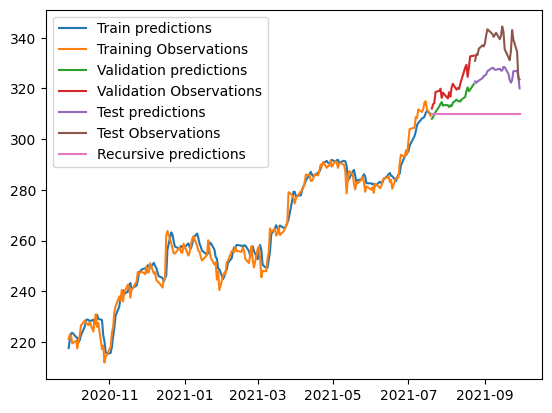

In [131]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, Y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, Y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, Y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Train predictions', 
            'Training Observations', 
            'Validation predictions', 
            'Validation Observations', 
            'Test predictions', 
            'Test Observations',
            'Recursive predictions'])
